In [132]:
using Random, Distributions, LinearAlgebra, DataFrames
using Plots

# Regression Data

In [133]:
# Train
num_train = 50
num_val = 50
batch_size = 10
n = num_train + num_val

# Parameters
noise = 0.001
noise = rand(Normal(n, 1)) * noise

w = [2, 3.4]
b = 4.2

4.2

In [134]:
noise = rand(Float64, (n, 1))


# X DATA
X = reshape(rand(Normal(0, 1), (n, length(w))), :, 2)

# Y DATA    
Y = X * reshape(transpose(w), :, 1) 
Y = Y + noise
foreach(x -> x + b, Y)

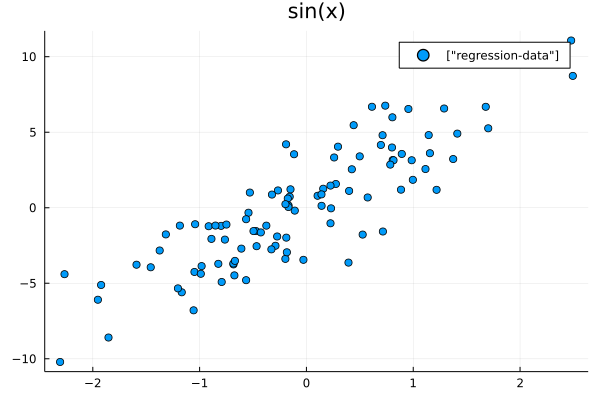

In [135]:
function plot_train(w, b, feature)
   # x = collect(Float64, 1:0.1:10)
   y = (w' * feature)
   foreach(x -> x + b, y)
   plot(feature, feature ->  w * feature .+ b, linewidth=2,legend=:false)
end
plot(X[:,2], Y, title="sin(x)", label=["regression-data"], seriestype=:scatter)


In [136]:
train_ind = collect(Int32, 0: num_train)
shuffle(train_ind)
train_x = Vector{Float64}()
for i in 1:length(train_ind)
    append!(train_x, X[i])
end


# Linear Regression Implementation

In [137]:
lr = 0.0001
iters = 3000

3000

In [138]:
x_1 = X[:,2]
n_features = size(x_1)
n_samples = 1
weight_ = zeros(Float64, n_features)
bias_ = 0.0
difference = 0

for _ in 0:1:iters
    y_pred = x_1 .* weight_
    y_pred = y_pred .+ bias_
    
    difference = y_pred .- Y

    dw = (1 / n_samples) * dot(x_1', (difference))
    db = (1 / n_samples) * sum(difference)

    # foreach(x -> x - (lr * dw), weight_)
    # foreach(x -> x - (lr * db), )
    bias_ = bias_ - (lr *db)
    weight_ = weight_ .- (lr * dw)
    # bias_ = bias_ - (lr * db)
end

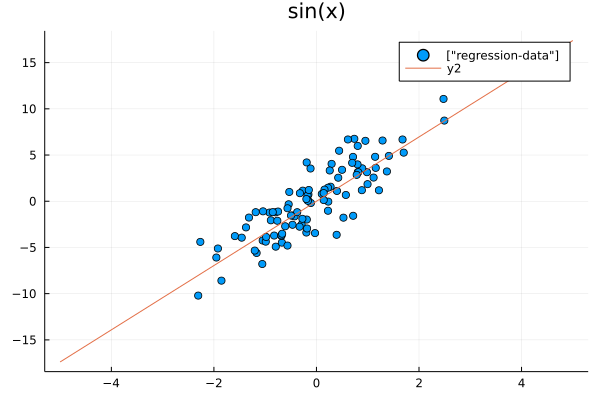

In [139]:
plot(X[:,2], Y, title="sin(x)", label=["regression-data"], seriestype=:scatter)
x = collect(Float64, -5:1:5)
# y0 = (x' .* weight_) .+ bias_
y0 = x .* weight_[1]
foreach(x -> x + bias_, y0)
plot!(x, y0)
# size(y0)

In [140]:
function predict(w, X, bias)
    y_pred = dot(X', w) .+ bias
    return y_pred
end

predict (generic function with 1 method)

In [142]:
predict(weight_, x_1, bias_)

-27.44567121273416